In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/penguins.csv',index_col=0)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [62]:
x = df.drop(columns=['species'])
x = pd.get_dummies(data=x,columns=['island', 'sex'])
x

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181,3750,2007,False,False,True,False,True
1,39.5,17.4,186,3800,2007,False,False,True,True,False
2,40.3,18.0,195,3250,2007,False,False,True,True,False
3,36.7,19.3,193,3450,2007,False,False,True,True,False
4,39.3,20.6,190,3650,2007,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
328,55.8,19.8,207,4000,2009,False,True,False,False,True
329,43.5,18.1,202,3400,2009,False,True,False,True,False
330,49.6,18.2,193,3775,2009,False,True,False,False,True
331,50.8,19.0,210,4100,2009,False,True,False,False,True


In [63]:
y = df['species']
y.unique()
y = y.map({'Adelie':0,'Gentoo':1, 'Chinstrap' : 2  })
y


0      0
1      0
2      0
3      0
4      0
      ..
328    2
329    2
330    2
331    2
332    2
Name: species, Length: 333, dtype: int64

In [64]:
np.bincount(y)

array([146, 119,  68])

In [65]:
x.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181,3750,2007,False,False,True,False,True
1,39.5,17.4,186,3800,2007,False,False,True,True,False
2,40.3,18.0,195,3250,2007,False,False,True,True,False
3,36.7,19.3,193,3450,2007,False,False,True,True,False
4,39.3,20.6,190,3650,2007,False,False,True,False,True


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1, stratify=y)
np.bincount(y), np.bincount(y_train)

(array([146, 119,  68]), array([117,  95,  54]))

In [68]:
decision_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
decision_tree.fit(x_train,y_train)
decision_tree.score(x_test,y_test)
# plot_decision_regions(x,y,model)


0.9850746268656716

In [69]:
decision_tree.predict([[40,15,200,2000,2000,0,1,0,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [70]:
from sklearn import tree
from sklearn.tree import export_graphviz


[Text(0.640625, 0.9166666666666666, 'x[2] <= 206.5\ngini = 0.638\nsamples = 266\nvalue = [117, 95, 54]'),
 Text(0.46875, 0.75, 'x[0] <= 43.35\ngini = 0.422\nsamples = 165\nvalue = [115, 0, 50]'),
 Text(0.3125, 0.5833333333333334, 'x[0] <= 42.35\ngini = 0.051\nsamples = 114\nvalue = [111, 0, 3]'),
 Text(0.1875, 0.4166666666666667, 'x[1] <= 16.7\ngini = 0.019\nsamples = 105\nvalue = [104, 0, 1]'),
 Text(0.125, 0.25, 'x[0] <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [7, 0, 1]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(0.4375, 0.4166666666666667, 'x[9] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [7, 0, 2]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.625, 0.5833333333333334, 'x[6] <= 0.5\ngini = 0.145\ns

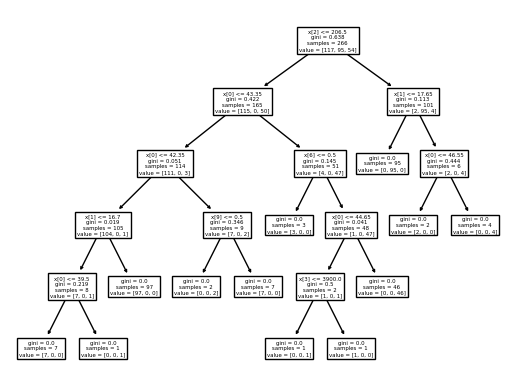

In [71]:
# dot_data = export_graphviz(tree)
# graph = Dot(dot_data)
# graph.write_png('tree.png')
tree.plot_tree(decision_tree) #plotting the decision tree using the tree feature of the sklearn

In [72]:
#Now to plot the tree in more detailed or readable way.

In [73]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
import matplotlib.image as mpimg

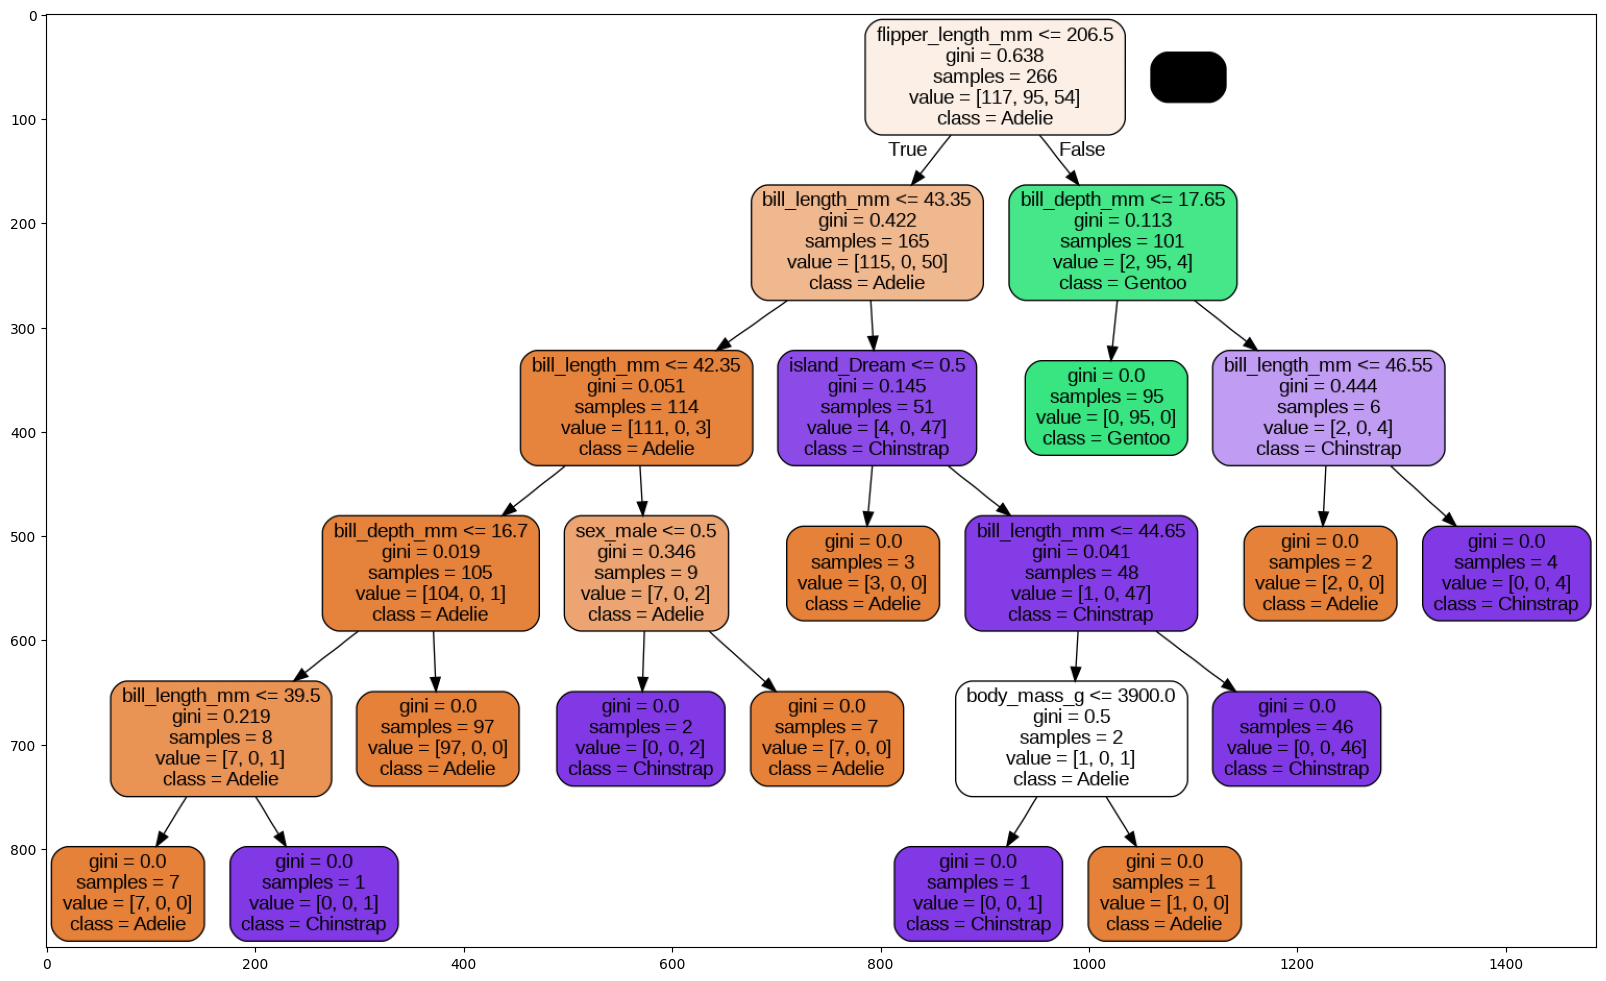

In [74]:
plt.figure(figsize=(20,20))
dot_data = export_graphviz(decision_tree,feature_names=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','year','island_Biscoe','island_Dream','island_Torgersen','sex_female','sex_male'], class_names=['Adelie','Gentoo','Chinstrap'],filled=True,rounded=True)
graph = graph_from_dot_data(dot_data, )
graph.write_png('tree.png')
plt.imshow(mpimg.imread('tree.png'))

In [75]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="flipper_length_mm <= 206.5\\ngini = 0.638\\nsamples = 266\\nvalue = [117, 95, 54]\\nclass = Adelie", fillcolor="#fcefe6"] ;\n1 [label="bill_length_mm <= 43.35\\ngini = 0.422\\nsamples = 165\\nvalue = [115, 0, 50]\\nclass = Adelie", fillcolor="#f0b88f"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="bill_length_mm <= 42.35\\ngini = 0.051\\nsamples = 114\\nvalue = [111, 0, 3]\\nclass = Adelie", fillcolor="#e6843e"] ;\n1 -> 2 ;\n3 [label="bill_depth_mm <= 16.7\\ngini = 0.019\\nsamples = 105\\nvalue = [104, 0, 1]\\nclass = Adelie", fillcolor="#e5823b"] ;\n2 -> 3 ;\n4 [label="bill_length_mm <= 39.5\\ngini = 0.219\\nsamples = 8\\nvalue = [7, 0, 1]\\nclass = Adelie", fillcolor="#e99355"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 7\\nvalue = [7, 0, 0]\\nclass = Adelie", fillcolor="#e58139"] ;\n4 -> 5 ;\n6 [label="gini = 0.0

In [76]:
#random_forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
forest = RandomForestClassifier(n_estimators=5, bootstrap=False, min_samples_split=3 )

In [79]:
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=3, n_estimators=5)

In [80]:
forest.score(x_train,y_train)

1.0

In [81]:
forest.score(x_test,y_test)

0.9850746268656716

[Text(0.6, 0.9375, 'x[5] <= 0.5\ngini = 0.638\nsamples = 266\nvalue = [117, 95, 54]'),
 Text(0.4, 0.8125, 'x[6] <= 0.5\ngini = 0.48\nsamples = 135\nvalue = [81, 0, 54]'),
 Text(0.3, 0.6875, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.6875, 'x[1] <= 19.35\ngini = 0.495\nsamples = 98\nvalue = [44, 0, 54]'),
 Text(0.3, 0.5625, 'x[1] <= 16.3\ngini = 0.5\nsamples = 77\nvalue = [38, 0, 39]'),
 Text(0.2, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.4, 0.4375, 'x[0] <= 42.3\ngini = 0.499\nsamples = 75\nvalue = [36, 0, 39]'),
 Text(0.2, 0.3125, 'x[1] <= 16.7\ngini = 0.054\nsamples = 36\nvalue = [35, 0, 1]'),
 Text(0.1, 0.1875, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.3, 0.1875, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.3125, 'x[3] <= 4075.0\ngini = 0.05\nsamples = 39\nvalue = [1, 0, 38]'),
 Text(0.5, 0.1875, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]'),
 Text(0.7, 0.1875, 'x[2] <= 193.5\ngini = 0.278\nsamples = 6\nvalue = 

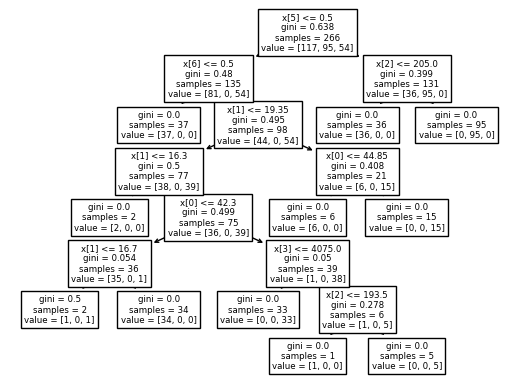

In [82]:
tree.plot_tree(forest[0])

In [83]:
print("Decision Tree")
print("Training data score: " ,decision_tree.score(x_train,y_train))
print("Testing data score: ", decision_tree.score(x_test,y_test))

Decision Tree
Training data score:  1.0
Testing data score:  0.9850746268656716


In [84]:
print('Random forest')
print("Training data score: " ,forest.score(x_train,y_train))
print("Testing data score: ", forest.score(x_test,y_test))

Random forest
Training data score:  1.0
Testing data score:  0.9850746268656716


[Text(0.3392857142857143, 0.9375, 'x[1] <= 16.4\ngini = 0.638\nsamples = 266\nvalue = [117, 95, 54]'),
 Text(0.14285714285714285, 0.8125, 'x[5] <= 0.5\ngini = 0.063\nsamples = 92\nvalue = [3, 89, 0]'),
 Text(0.07142857142857142, 0.6875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.21428571428571427, 0.6875, 'gini = 0.0\nsamples = 89\nvalue = [0, 89, 0]'),
 Text(0.5357142857142857, 0.8125, 'x[0] <= 44.25\ngini = 0.473\nsamples = 174\nvalue = [114, 6, 54]'),
 Text(0.35714285714285715, 0.6875, 'x[9] <= 0.5\ngini = 0.067\nsamples = 115\nvalue = [111, 0, 4]'),
 Text(0.2857142857142857, 0.5625, 'x[0] <= 42.3\ngini = 0.128\nsamples = 58\nvalue = [54, 0, 4]'),
 Text(0.21428571428571427, 0.4375, 'x[2] <= 187.5\ngini = 0.036\nsamples = 55\nvalue = [54, 0, 1]'),
 Text(0.14285714285714285, 0.3125, 'x[2] <= 186.5\ngini = 0.083\nsamples = 23\nvalue = [22, 0, 1]'),
 Text(0.07142857142857142, 0.1875, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0]'),
 Text(0.21428571428571427, 0.1875, 'x[1] <=

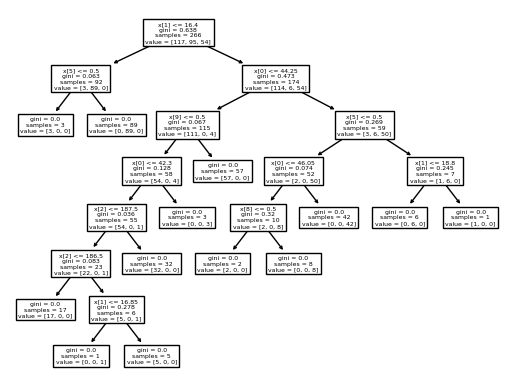

In [87]:
tree.plot_tree(forest[1])

In [88]:
import pickle

In [95]:
pickle.dump(forest,open('forest_model.pkl','wb'))

In [100]:
model = pickle.load(open('/content/forest_model.pkl','rb'))

In [101]:
model.score(x_test,y_test)

0.9850746268656716

In [105]:
prediction  = (model.predict([[12,13,45,1234,2009,1,0,0,1,0],[12,137,45,1234,2009,1,0,0,0,1]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [106]:
prediction

array([0, 0])

In [109]:
prediction = pd.Series(prediction)
prediction

0    0
1    0
dtype: int64

In [110]:
prediction.map({0:'Adelie', 1:'Gentoo', 2:'Chinstrap'})

0    Adelie
1    Adelie
dtype: object